ANN-PSO Model - RMSE: 2914.138764209006, R²: 0.9572982999149819


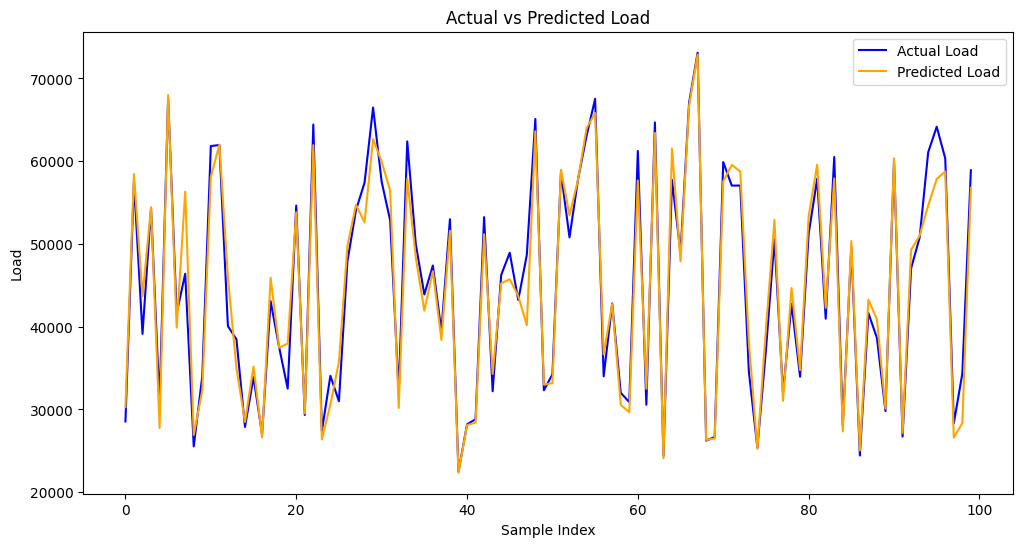

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/final_generated_data.csv')

# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'year', 'month', 'day', 'hour', 'weekday', 'Inflation']
target = 'Load'

# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ANN-PSO Model
ann_pso_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs',
                             max_iter=1000, random_state=0)
ann_pso_model.fit(X_train, y_train.ravel())
y_pred_ann_pso = ann_pso_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv_ann_pso = target_scaler.inverse_transform(y_pred_ann_pso.reshape(-1, 1)).flatten()
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate metrics
rmse_ann_pso = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_ann_pso))
r2_ann_pso = r2_score(y_test_inv, y_pred_inv_ann_pso)
print(f'ANN-PSO Model - RMSE: {rmse_ann_pso}, R²: {r2_ann_pso}')

# Plot some subset of data (e.g., first 100 points)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:100], label='Actual Load', color='blue')
plt.plot(y_pred_inv_ann_pso[:100], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.legend()
plt.show()


# Build LSTM model
**bold text**

Epoch 1/150
800/800 [==============================] - 10s 7ms/step - loss: 0.0307 - val_loss: 0.0129
Epoch 2/150
800/800 [==============================] - 5s 7ms/step - loss: 0.0137 - val_loss: 0.0110
Epoch 3/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 4/150
800/800 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 0.0081
Epoch 5/150
800/800 [==============================] - 6s 8ms/step - loss: 0.0093 - val_loss: 0.0072
Epoch 6/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0084 - val_loss: 0.0067
Epoch 7/150
800/800 [==============================] - 4s 5ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 8/150
800/800 [==============================] - 6s 7ms/step - loss: 0.0071 - val_loss: 0.0056
Epoch 9/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 10/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0063 - val_l

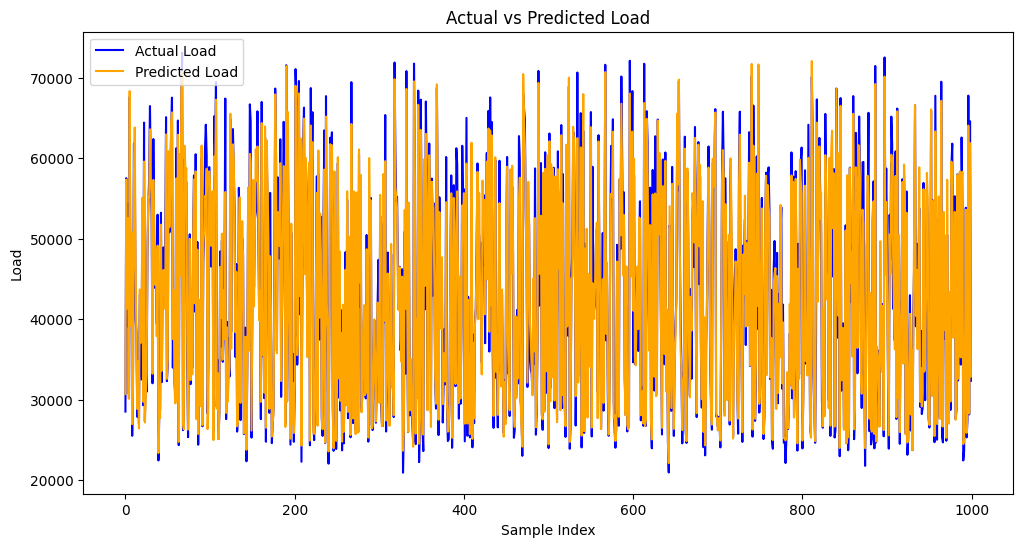

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your data
data = pd.read_csv('/content/final_generated_data.csv')

# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'year', 'month', 'day', 'hour', 'weekday', 'Inflation']
target = 'Load'

# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predict single value (Load)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
history = lstm_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Predict
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv_lstm = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)

# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_lstm))
r2_lstm = r2_score(y_test_inv, y_pred_inv_lstm)
print(f'LSTM Model - RMSE: {rmse_lstm}, R²: {r2_lstm}')

# Plot some subset of data (e.g., first 100 points)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:1000], label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm[:1000], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.legend()
plt.show()


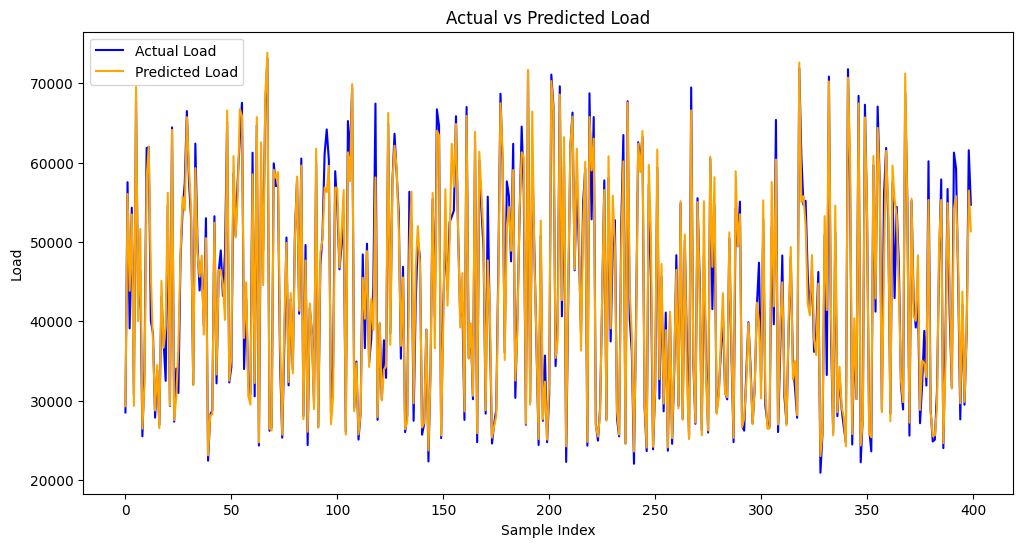

In [ ]:
# Plot some subset of data (e.g., first 100 points)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:400], label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm[:400], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.legend()
plt.show()


# Build the LSTM model with an ANN layer


Epoch 1/150
800/800 [==============================] - 11s 9ms/step - loss: 0.0694 - val_loss: 0.0271
Epoch 2/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0298 - val_loss: 0.0216
Epoch 3/150
800/800 [==============================] - 7s 8ms/step - loss: 0.0245 - val_loss: 0.0182
Epoch 4/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0210 - val_loss: 0.0152
Epoch 5/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0177 - val_loss: 0.0126
Epoch 6/150
800/800 [==============================] - 6s 8ms/step - loss: 0.0156 - val_loss: 0.0108
Epoch 7/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0140 - val_loss: 0.0096
Epoch 8/150
800/800 [==============================] - 6s 8ms/step - loss: 0.0129 - val_loss: 0.0087
Epoch 9/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0118 - val_loss: 0.0081
Epoch 10/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0112 - val_l

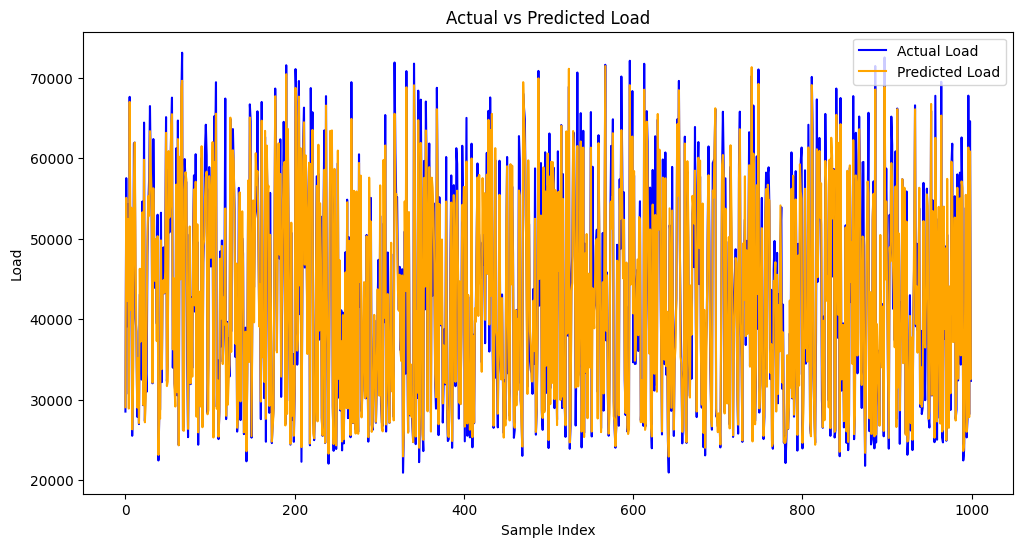

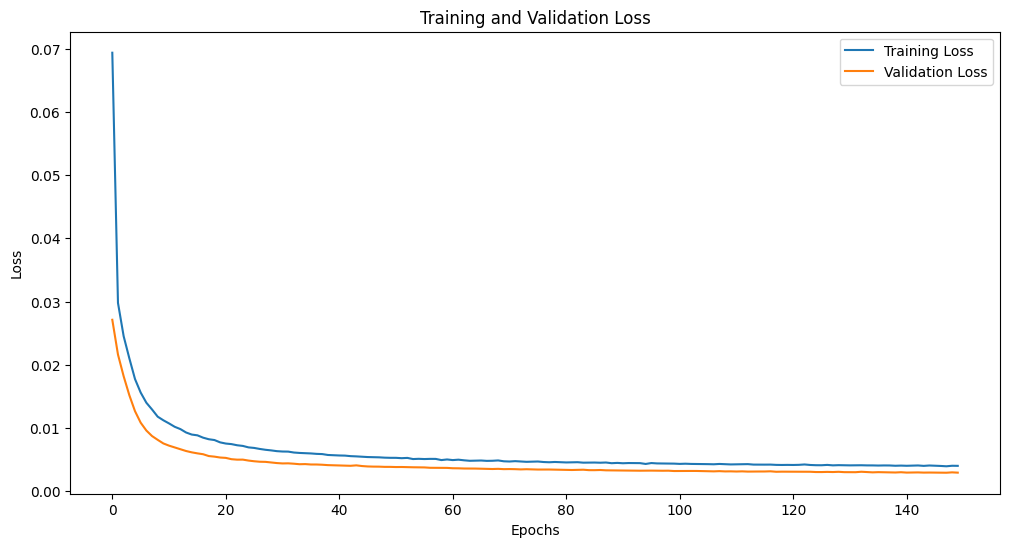

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats

# Load your data
data = pd.read_csv('final_generated_data.csv')

# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'year', 'month', 'day', 'hour', 'weekday', 'Inflation']
target = 'Load'
# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model with an ANN layer
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape[1], input_shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predict single value (Load)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    return model

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_model = build_lstm_model((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
history = lstm_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv_lstm = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)

# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_lstm))
r2_lstm = r2_score(y_test_inv, y_pred_inv_lstm)
print(f'LSTM Model - RMSE: {rmse_lstm}, R²: {r2_lstm}')

# Plot some subset of data (e.g., first 1000 points)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:1000], label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm[:1000], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


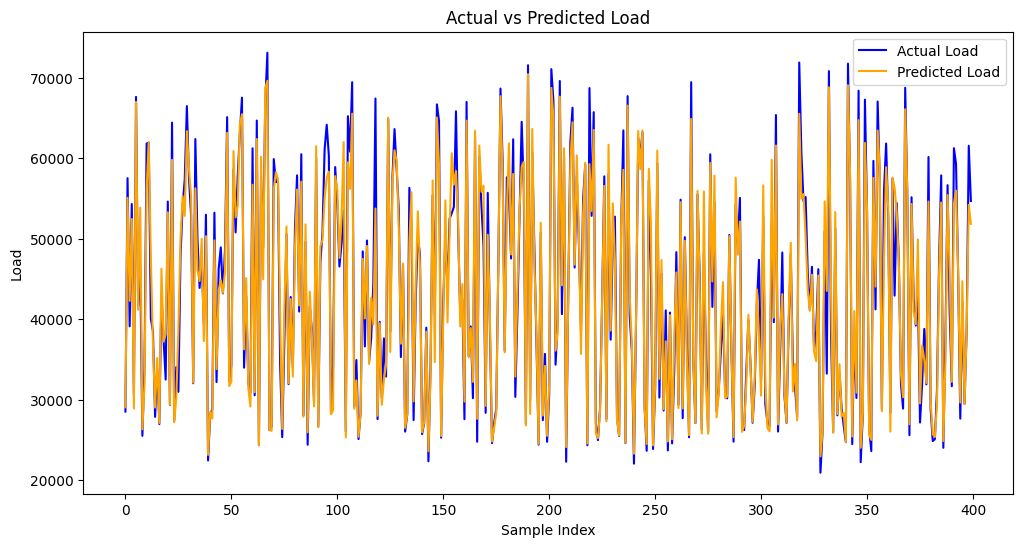

In [ ]:
# Plot some subset of data (e.g., first 100 points)
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:400], label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm[:400], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load')
plt.xlabel('Sample Index')
plt.ylabel('Load')
plt.legend()
plt.show()


**# Predict single value (Load)**

Epoch 1/150
800/800 [==============================] - 12s 9ms/step - loss: 0.0279 - val_loss: 0.0140
Epoch 2/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0137 - val_loss: 0.0105
Epoch 3/150
800/800 [==============================] - 7s 9ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 4/150
800/800 [==============================] - 5s 7ms/step - loss: 0.0097 - val_loss: 0.0072
Epoch 5/150
800/800 [==============================] - 6s 7ms/step - loss: 0.0085 - val_loss: 0.0062
Epoch 6/150
800/800 [==============================] - 6s 7ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 7/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0073 - val_loss: 0.0058
Epoch 8/150
800/800 [==============================] - 6s 8ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 9/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 10/150
800/800 [==============================] - 5s 6ms/step - loss: 0.0062 - val_l

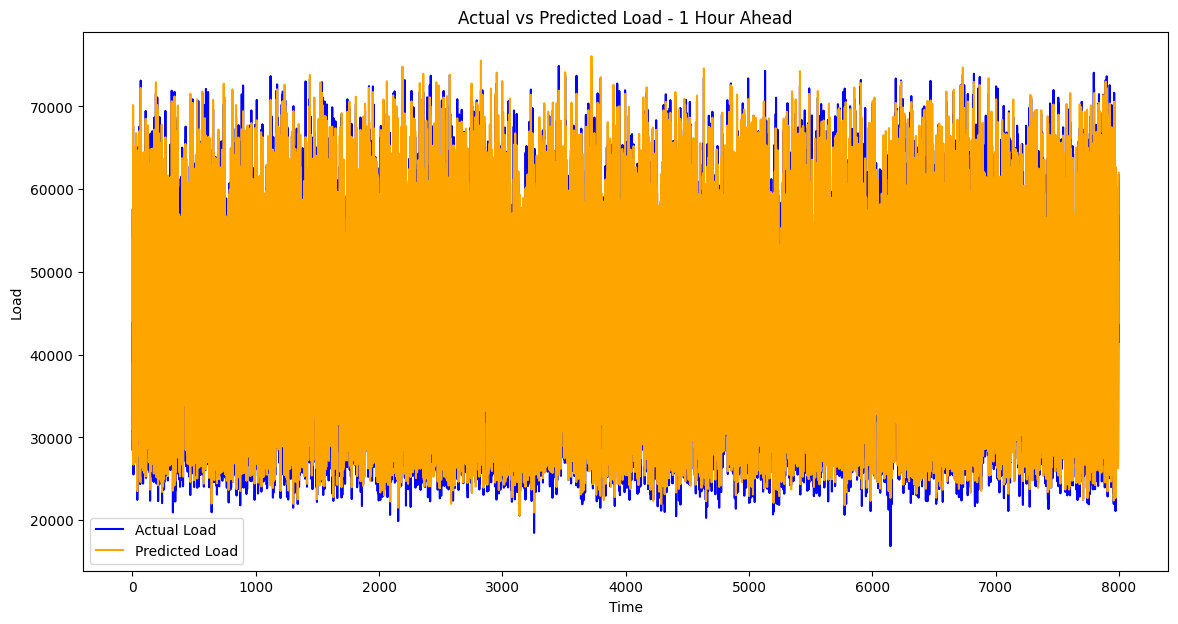

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your data
data = pd.read_csv('/content/final_generated_data.csv')

# Add lagged feature
data['Load_lagged'] = data['Load'].shift(1)
data = data.dropna()

# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'year', 'month', 'day', 'hour', 'weekday', 'Inflation', 'Load_lagged']
target = 'Load'

# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])

# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predict single value (Load)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
history = lstm_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Predict
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv_lstm = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)

# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_lstm))
r2_lstm = r2_score(y_test_inv, y_pred_inv_lstm)
print(f'LSTM Model - RMSE: {rmse_lstm}, R²: {r2_lstm}')

# Plot actual vs predicted loaduchdi
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm, label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load - 1 Hour Ahead')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()


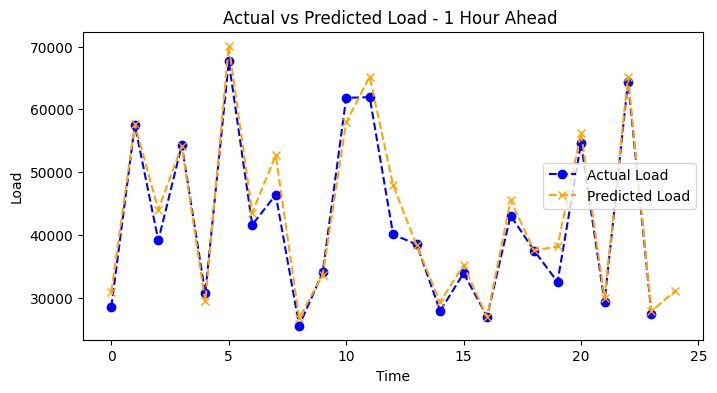

In [ ]:


# Plot actual vs predicted load
plt.figure(figsize=(8, 4))
plt.plot(y_test_inv[:24], label='Actual Load', color='blue', marker='o', linestyle='dashed')
plt.plot(y_pred_inv_lstm[:25], label='Predicted Load', color='orange', marker='x', linestyle='dashed')
plt.title('Actual vs Predicted Load - 1 Hour Ahead ')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Assuming y_test_inv and y_pred_inv_lstm contain the actual and predicted load values respectively
# Normalize data to 0-1 range for plotting
y_test_norm = (y_test_inv - np.min(y_test_inv)) / (np.max(y_test_inv) - np.min(y_test_inv))
y_pred_norm = (y_pred_inv_lstm - np.min(y_pred_inv_lstm)) / (np.max(y_pred_inv_lstm) - np.min(y_pred_inv_lstm))

def plot_rolling_average(window_size):
    # Calculate rolling average
    y_test_rolling = pd.Series(y_test_norm.flatten()).rolling(window=window_size).mean()
    y_pred_rolling = pd.Series(y_pred_norm.flatten()).rolling(window=window_size).mean()

    # Plot settings
    fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i in range(5):
        # Real Load
        axes[0, i].plot(y_test_norm[i*21:(i+1)*21], color='blue')
        axes[0, i].set_ylim([0, 1])
        axes[0, i].set_title('Real Load')

        # Generated Load
        axes[1, i].plot(y_pred_norm[i*21:(i+1)*21], color='red')
        axes[1, i].set_ylim([0, 1])
        axes[1, i].set_title('Generated Load')

        # Real Load Rolling Average
        axes[2, i].plot(y_test_rolling[i*21:(i+1)*21], color='blue')
        axes[2, i].set_ylim([0, 1])
        axes[2, i].set_title('Real Load Rolling Avg')

        # Generated Load Rolling Average
        axes[3, i].plot(y_pred_rolling[i*21:(i+1)*21], color='red')
        axes[3, i].set_ylim([0, 1])
        axes[3, i].set_title('Generated Load Rolling Avg')

    # Calculate metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv_lstm)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test_inv - y_pred_inv_lstm))
    r2 = r2_score(y_test_inv, y_pred_inv_lstm)
    mape = np.mean(np.abs((y_test_inv - y_pred_inv_lstm) / y_test_inv)) * 100

    # Display metrics on the plot
    fig.suptitle(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}, MAPE: {mape:.2f}%')

    plt.show()

# Create a slider widget for window size
window_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Window Size:')
widgets.interact(plot_rolling_average, window_size=window_slider)


interactive(children=(IntSlider(value=5, description='Window Size:', max=20, min=1), Output()), _dom_classes=(…

<function __main__.plot_rolling_average(window_size)>